<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,88.505118,1.333306,99.838424,98.843212,0.995212
1,0.0,1.0,43.915809,1.278102,55.193911,53.187095,2.006816
2,0.0,2.0,21.270814,-0.078597,31.192218,30.000314,1.191904
3,0.0,3.0,65.013732,-4.641198,70.372534,74.789790,-4.417256
4,0.0,4.0,51.892866,2.733567,64.626433,61.355004,3.271429
...,...,...,...,...,...,...,...
29995,999.0,25.0,53.713006,-2.614104,61.098902,64.412994,-3.314092
29996,999.0,26.0,51.843971,2.210450,64.054421,62.650796,1.403624
29997,999.0,27.0,76.356838,-0.432306,85.924532,85.762460,0.162072
29998,999.0,28.0,32.477467,2.827219,45.304686,44.391320,0.913367


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,88.505118,1.333306,99.838424,98.843212,0.995212
1,0.0,1.0,43.915809,1.278102,55.193911,53.187095,2.006816
2,0.0,2.0,21.270814,-0.078597,31.192218,30.000314,1.191904
3,0.0,3.0,65.013732,-4.641198,70.372534,74.789790,-4.417256
4,0.0,4.0,51.892866,2.733567,64.626433,61.355004,3.271429
...,...,...,...,...,...,...,...
29995,999.0,25.0,53.713006,-2.614104,61.098902,64.412994,-3.314092
29996,999.0,26.0,51.843971,2.210450,64.054421,62.650796,1.403624
29997,999.0,27.0,76.356838,-0.432306,85.924532,85.762460,0.162072
29998,999.0,28.0,32.477467,2.827219,45.304686,44.391320,0.913367


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    88.505118  1.333306  99.838424  98.843212  0.995212
      1.0    43.915809  1.278102  55.193911  53.187095  2.006816
      2.0    21.270814 -0.078597  31.192218  30.000314  1.191904
      3.0    65.013732 -4.641198  70.372534  74.789790 -4.417256
      4.0    51.892866  2.733567  64.626433  61.355004  3.271429
...                ...       ...        ...        ...       ...
999.0 25.0   53.713006 -2.614104  61.098902  64.412994 -3.314092
      26.0   51.843971  2.210450  64.054421  62.650796  1.403624
      27.0   76.356838 -0.432306  85.924532  85.762460  0.162072
      28.0   32.477467  2.827219  45.304686  44.391320  0.913367
      29.0   87.097427 -3.381230  93.716197  95.889096 -2.172900

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    88.505118  1.333306  99.838424  98.843212  0.995212
      1.0    43.915809  1.278102  55.193911  53.187095  2.006816
      2.0    21.270814 -0.078597  31.192218  30.000314  1.191904
      3.0    65.013732 -4.641198  70.372534  74.789790 -4.417256
      4.0    51.892866  2.733567  64.626433  61.355004  3.271429
...                ...       ...        ...        ...       ...
999.0 25.0   53.713006 -2.614104  61.098902  64.412994 -3.314092
      26.0   51.843971  2.210450  64.054421  62.650796  1.403624
      27.0   76.356838 -0.432306  85.924532  85.762460  0.162072
      28.0   32.477467  2.827219  45.304686  44.391320  0.913367
      29.0   87.097427 -3.381230  93.716197  95.889096 -2.172900

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,88.505118,1.333306,99.838424,98.843212,0.995212
1,0.0,1.0,43.915809,1.278102,55.193911,53.187095,2.006816
2,0.0,2.0,21.270814,-0.078597,31.192218,30.000314,1.191904
3,0.0,3.0,65.013732,-4.641198,70.372534,74.789790,-4.417256
4,0.0,4.0,51.892866,2.733567,64.626433,61.355004,3.271429
...,...,...,...,...,...,...,...
29995,999.0,25.0,53.713006,-2.614104,61.098902,64.412994,-3.314092
29996,999.0,26.0,51.843971,2.210450,64.054421,62.650796,1.403624
29997,999.0,27.0,76.356838,-0.432306,85.924532,85.762460,0.162072
29998,999.0,28.0,32.477467,2.827219,45.304686,44.391320,0.913367


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    88.505118  1.333306  99.838424  98.843212  0.995212
      1.0    43.915809  1.278102  55.193911  53.187095  2.006816
      2.0    21.270814 -0.078597  31.192218  30.000314  1.191904
      3.0    65.013732 -4.641198  70.372534  74.789790 -4.417256
      4.0    51.892866  2.733567  64.626433  61.355004  3.271429
...                ...       ...        ...        ...       ...
999.0 25.0   53.713006 -2.614104  61.098902  64.412994 -3.314092
      26.0   51.843971  2.210450  64.054421  62.650796  1.403624
      27.0   76.356838 -0.432306  85.924532  85.762460  0.162072
      28.0   32.477467  2.827219  45.304686  44.391320  0.913367
      29.0   87.097427 -3.381230  93.716197  95.889096 -2.172900

[30000 rows x 5 columns]

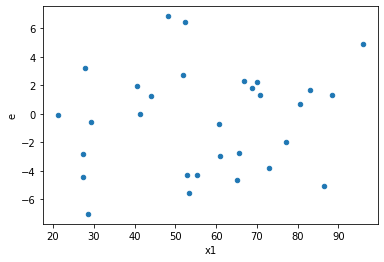

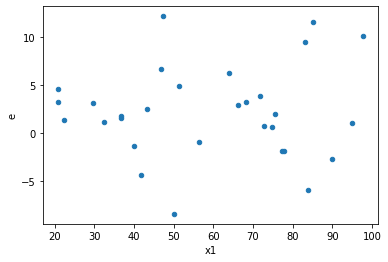

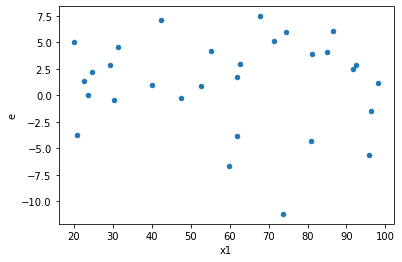

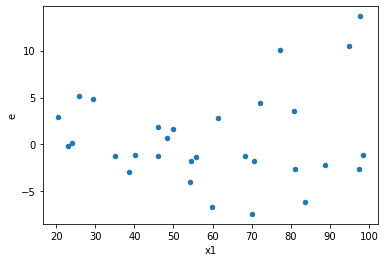

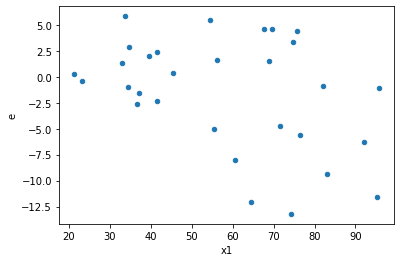

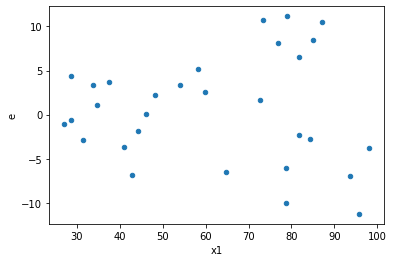

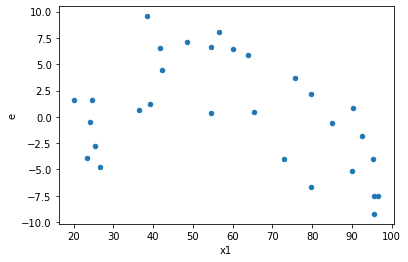

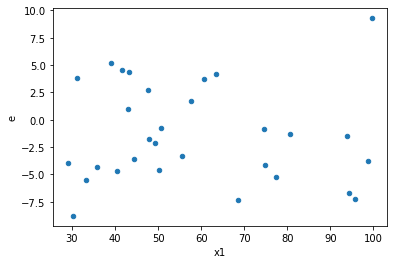

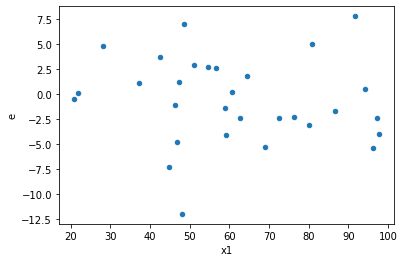

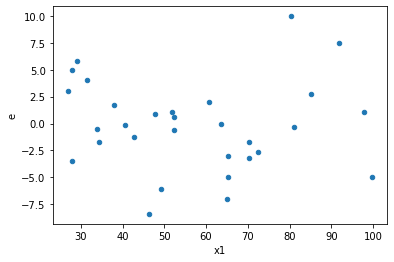

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,11.0,176.8267340105255,309.8805761671872,16.0751576373205,28.17096146974429,1.752453201724247,0.36613233485711816,0.8169338325714409,0.18306616742855908,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,91.75420705949134,316.7866618565834,8.341291550862849,28.79878744150758,3.4525573486912284,0.05107104432416909,0.9744644778379155,0.025535522162084545,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,61.19266131290159,471.5156918734259,5.562969210263781,42.865062897584174,7.705428751699244,0.0020654430892872444,0.9989672784553564,0.0010327215446436222,Reject001=0 : Heteroscedasticity
4.0,11.0,11.0,65.36743146474515,349.67107749951504,5.942493769522287,31.788279772683186,5.349316466382871,0.00977705438978349,0.9951114728051083,0.004888527194891745,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,117.33350217605123,644.8833971266342,10.666682016004657,58.625763375148566,5.496157407447269,0.00875532232776477,0.9956223388361176,0.004377661163882385,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,105.37623868944452,137.72131988889578,9.579658062676774,12.520119989899616,1.3069485265532754,0.6647749535793879,0.6676125232103061,0.33238747678969394,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,199.70005585526522,291.0679811229066,18.154550532296838,26.46072555662787,1.4575257872429503,0.5425349995957709,0.7287325002021146,0.27126749979788545,Reject001=1 : Homoscedasticity
9.0,11.0,11.0,123.04573898457136,234.6759991507648,11.18597627132467,21.334181740978618,1.9072257283138483,0.2992751895898367,0.8503624052050817,0.14963759479491834,Reject001=1 : Homoscedasticity
11.0,11.0,11.0,128.36042218656803,392.21242223488235,11.669129289688003,35.65567474862567,3.0555557200085657,0.0771082218431689,0.9614458890784155,0.03855411092158445,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,95.38469247811108,92.19080968701975,8.67133567982828,8.380982698819977,0.9665157719953412,0.9559715351999859,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,176.8267340105255,309.8805761671872,16.0751576373205,28.17096146974429,1.752453201724247,0.36613233485711816,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,91.75420705949134,316.7866618565834,8.341291550862849,28.79878744150758,3.4525573486912284,0.05107104432416909,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,61.19266131290159,471.5156918734259,5.562969210263781,42.865062897584174,7.705428751699244,0.0020654430892872444,Reject001=0 : Heteroscedasticity
4.0,11.0,11.0,65.36743146474515,349.67107749951504,5.942493769522287,31.788279772683186,5.349316466382871,0.00977705438978349,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,117.33350217605123,644.8833971266342,10.666682016004657,58.625763375148566,5.496157407447269,0.00875532232776477,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,105.37623868944452,137.72131988889578,9.579658062676774,12.520119989899616,1.3069485265532754,0.6647749535793879,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,199.70005585526522,291.0679811229066,18.154550532296838,26.46072555662787,1.4575257872429503,0.5425349995957709,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,306.1942848225261,180.63412049233958,27.835844074775096,16.42128368112178,0.5899330243771117,0.39490460576480524,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      934
Reject001=0 : Heteroscedasticity     66
Name: Result_test, dtype: int64